# Plotting Stress-strain curves in reproducible way
This tutorial will show how to plot 'publication' quality stress strain curves using python. 
The datasets are in form of excel files, which we assume to be the standard way in which the stress strain curve data is stored. 
The tutorial will cover basics of python programming language.
Moreover, this notebook can be modified to handle large amounts of datafiles of similar format to plot multiple curves at once and have a reproducible plotting style

# Why use python for plotting?

- Flexible, any special plot feature can be created
- Free and open source
- calculations are faster and other options for data analysis
- reproducibility
- Automate repetitive steps


*with **jupterhub server** python is easier to use than ever*

## Modules in python
Python has a huge library of codes. 
These different types of codes can be bound together into modules.
When we want to use these set of codes for certain purpose, we **import** them.
Once you import some module, you can use the functions/classes etc present in it.

To enable use of access, we also rename the modules to the names we want. 
Following modules are used in this notebook:
1. [pandas](https://pandas.pydata.org/)            - For Data analysis and manipulation 
2. [numpy](https://numpy.org/)                     - Package for numerical/scientific computing with lots of array based calculations 
3. [math](https://docs.python.org/3/library/math.html) - Module for mathematical functions
3. [matplotlib](https://matplotlib.org/)           - The most widely used plotting library based on python 
4. [os](https://docs.python.org/3/library/os.html) - Library for Operating system related functionality

In [1]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib as mpl
import matplotlib.pyplot as PyPlot
%matplotlib inline

### Reading in excel file
Based on my excel file, I know that the relevant data is from row 5 (in python it is row 4 as counting starts from 0).

And I use only columns A to L.

In the function below, we first give the name of the excel file.

Then we specify, from which row in the excel file is used to label our data. 

As row 4 (start counting at 0!!) has the column names, we say header is 4.


This is how the file looks here now in form of a **DataFrame**

In [3]:
df

,Unnamed: 0,Time (s),Temperature (°C),Change in Length (µm),Force (N),Change in length (µm),Abs. Change in length (µm),Eng. Strain,Eng. Stress (MPa),Length (µm),True Strain,True Stress
0,4,0.000958,999.203430,80.129005,10.600432,0.000000,0.000000,0.000000,0.539876,10.000000,0.000000,0.539876
1,5,0.001274,999.178467,79.966232,10.680738,-0.162773,0.162773,-0.000016,0.543966,9.999837,0.000016,0.543957
2,6,0.001600,999.369263,80.590210,12.420709,0.461205,-0.461205,0.000046,0.632581,10.000461,-0.000046,0.632611
3,7,0.001916,999.375610,80.548386,12.376094,0.419380,-0.419380,0.000042,0.630309,10.000419,-0.000042,0.630336
4,8,0.002231,999.448853,81.161438,13.069108,1.032433,-1.032433,0.000103,0.665604,10.001032,-0.000103,0.665673
...,...,...,...,...,...,...,...,...,...,...,...,...
3390,3394,1.085596,1003.625183,-5808.419434,13.129526,-5888.548439,5888.548439,-0.588855,0.668681,4.111452,0.888809,0.274925
3391,3395,1.085926,1003.529785,-5808.728516,12.607720,-5888.857521,5888.857521,-0.588886,0.642106,4.111142,0.888884,0.263979
3392,3396,1.086243,1003.397522,-5808.293457,13.705363,-5888.422462,5888.422462,-0.588842,0.698008,4.111578,0.888778,0.286992
3393,3397,1.086557,1003.240112,-5808.186523,13.714368,-5888.315529,5888.315529,-0.588832,0.698467,4.111684,0.888752,0.287188


### Accessing data within a dataframe
The data in the columns of a dataframe can be accessed by calling out the name of the column as shown below

In [4]:
df['True Strain']

0       0.000000
1       0.000016
2      -0.000046
3      -0.000042
4      -0.000103
          ...   
3390    0.888809
3391    0.888884
3392    0.888778
3393    0.888752
3394    0.888735
Name: True Strain, Length: 3395, dtype: float64

### Plotting

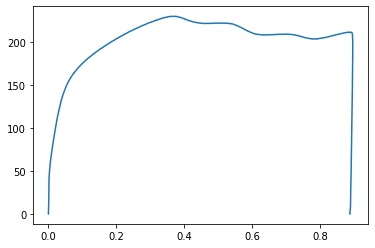

In [5]:
PyPlot.plot(df['True Strain'],df['True Stress'])

## Looping over files
But as we want to use the power that python provides, we would like to do everything at once. 
***Loop*** give us this power - Looping is basically repeating a set of commands number of times

Also we need to know something about the datatypes in python: 
**Lists** and **Dictionaries**


### List example
This is an example of list. It is denoted by square brackets **[ ]**

It is used to store iterable (looping possibilities) items to be called by a single variable.

In [6]:
# empty list
example_list = []

# list of integers
example_list = [1, 2, 3]

In [7]:
# Call list items
example_list[0]

1

In the example below, the list has multiple file names which we can loop over (iterable).

In [41]:
os.listdir('sample_data/')

['Data_1.xlsx', 'Data_2.xlsx', 'Data_3.xlsx', 'Data_4.xlsx']

### Dictionary example
Dictionary is similar to our 'normal' dictionaries. They are denoted by curly brackets **{ }**. 

Dictionaries can store any kind of data/data structure as values.

We have key and value pairs.

In [9]:
example_dict = {'a':1, 'b': 2}
example_dict = {'a':'Apple', 'b': 'Banana'}
example_dict = {'a':[1,2,3], 'b': [4,5,6]}

In [13]:
# what does one specific key correspond to?
example_dict['a']

[1, 2, 3]

So we will create a dictionary which will reference to the dataframes like we saw before

We will create a empty dictionary and then add entries to it

In [18]:
data_dict = {}
for i in os.listdir('sample_data/'):


In [19]:
data_dict.keys()

dict_keys(['Data_1.xlsx', 'Data_2.xlsx', 'Data_3.xlsx', 'Data_4.xlsx'])

In [20]:
data_dict['Data_1.xlsx']

,Unnamed: 0,Time (s),Temperature (°C),Change in Length (µm),Force (N),Change in length (µm),Abs. Change in length (µm),Eng. Strain,Eng. Stress (MPa),Length (µm),True Strain,True Stress
0,4,0.000958,999.203430,80.129005,10.600432,0.000000,0.000000,0.000000,0.539876,10.000000,0.000000,0.539876
1,5,0.001274,999.178467,79.966232,10.680738,-0.162773,0.162773,-0.000016,0.543966,9.999837,0.000016,0.543957
2,6,0.001600,999.369263,80.590210,12.420709,0.461205,-0.461205,0.000046,0.632581,10.000461,-0.000046,0.632611
3,7,0.001916,999.375610,80.548386,12.376094,0.419380,-0.419380,0.000042,0.630309,10.000419,-0.000042,0.630336
4,8,0.002231,999.448853,81.161438,13.069108,1.032433,-1.032433,0.000103,0.665604,10.001032,-0.000103,0.665673
...,...,...,...,...,...,...,...,...,...,...,...,...
3390,3394,1.085596,1003.625183,-5808.419434,13.129526,-5888.548439,5888.548439,-0.588855,0.668681,4.111452,0.888809,0.274925
3391,3395,1.085926,1003.529785,-5808.728516,12.607720,-5888.857521,5888.857521,-0.588886,0.642106,4.111142,0.888884,0.263979
3392,3396,1.086243,1003.397522,-5808.293457,13.705363,-5888.422462,5888.422462,-0.588842,0.698008,4.111578,0.888778,0.286992
3393,3397,1.086557,1003.240112,-5808.186523,13.714368,-5888.315529,5888.315529,-0.588832,0.698467,4.111684,0.888752,0.287188


#### Finding stress and strain limits in the whole dataset

In [22]:
max_stress_lim = 0.0
max_strain_lim = 0.0
for expt_data in data_dict.values():
    max_y_lim = #finding maximum stress for a given file
    max_x_lim = #finding maximum strain for a given file
    if max_y_lim > max_stress_lim:
        max_stress_lim = max_y_lim
    if max_x_lim > max_strain_lim:
        max_strain_lim = max_x_lim

In [23]:
max_strain_lim

0.8982107658233847

In [24]:
max_stress_lim

253.67019269840904

Rounding off values

In [25]:
max_strain_lim = round(max_strain_lim * 2.0) / 2.0
max_stress_lim = (round(max_stress_lim/50.0)+2.0)*50.0

In [26]:
max_stress_lim,max_strain_lim

(350.0, 1.0)

## Plot settings

Create a simple plot by looping

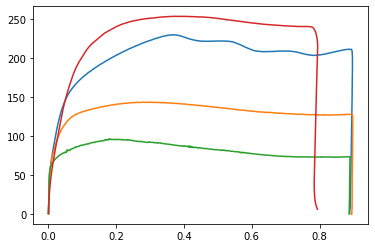

In [43]:
fig, ax = PyPlot.subplots()

for datas in data_dict.values():
    PyPlot.plot(datas['True Strain'],
                datas['True Stress']
                )

This is a very simple plot
Not yet publication ready.

Generally we change following things:
1. Colors
2. Linestyles
3. Linewidths
4. Labels
5. Axes labels
6. Axes limits
7. Axes ticks (optional)

In [27]:
set_colors = ['black','red','teal','fuchsia','blue'] # https://matplotlib.org/gallery/color/named_colors.html

In [29]:
linestyle_list = ['solid', 'dashed', 'dashdot', 'dotted']
label_list = [1073,1173,1273,1373]

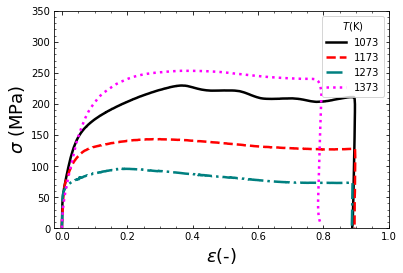

In [30]:
fig, ax = PyPlot.subplots()
ax.tick_params(which='both',direction="in",top=True,right=True)
ax.minorticks_on()

#for count,i in enumerate(data_dict.keys()):
for datas,line,colors,labels in zip(data_dict.values(),linestyle_list,set_colors,label_list):
    PyPlot.plot(datas['True Strain'],
                datas['True Stress'],
                color=colors,
                linewidth = 2.5,
                linestyle = line,
                label = labels
                )
    PyPlot.xlim(-0.025,max_strain_lim)
    PyPlot.ylim(0.0,max_stress_lim)
    PyPlot.xlabel(r'$\epsilon$(-)',fontsize=18)   # latex based symbols
    PyPlot.ylabel(r'$\sigma$ (MPa)',fontsize=18)
    PyPlot.legend(title=r'$ T (\mathrm{K})$')#,title_fontsize ='large')
        
fig.savefig('multi_stress_strain.png',dpi=600)

### Cutting off data

Can be done automatically but easiest way is manually.

We can look at where we want to cut off and give that value

In [31]:
cut_off_strains = []
data_dict_2 = {}
data_dict_2['Data_1.xlsx'] = data_dict['Data_1.xlsx'].loc[data_dict['Data_1.xlsx']['True Strain'] < 0.88]

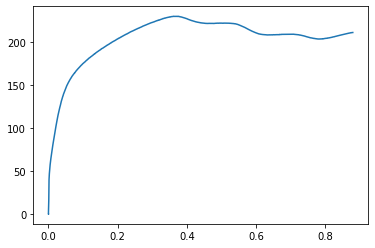

In [32]:
PyPlot.plot(data_dict_2['Data_1.xlsx']['True Strain'],data_dict_2['Data_1.xlsx']['True Stress'])

## Automating cut off

Idea: See where the derivative drops significantly

For automation might need smooth data

Need simpler ideas for python newbies. I dont want to make a complicated code. 

In [33]:
from scipy.signal import savgol_filter

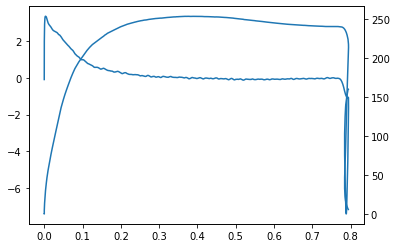

In [34]:
fig,ax1 = PyPlot.subplots()
ax1.plot(data_dict['Data_4.xlsx']['True Strain'],savgol_filter(data_dict['Data_4.xlsx']['True Stress'],31,9,deriv=1))
ax2 = ax1.twinx()
ax2.plot(data_dict['Data_4.xlsx']['True Strain'],data_dict['Data_4.xlsx']['True Stress'])

In [35]:
index_min = np.argmin(savgol_filter(data_dict['Data_1.xlsx']['True Stress'],71,9,deriv=1))
data_dict['Data_1.xlsx']['True Strain'][index_min]

0.8953057035808059

In [36]:
math.floor(0.8953057035808059*50.0)/50.0

0.88

In [37]:
data_dict['Data_4.xlsx'].loc[data_dict['Data_4.xlsx']['True Strain'] < 0.88]

,Unnamed: 0,Time (s),Temperature (°C),Change in Length (µm),Force (N),Change in length (µm),Abs. Change in length (µm),Eng. Strain,Eng. Stress (MPa),Length (µm),True Strain,True Stress
0,4,0.000399,999.325928,83.389412,11.001963,0.000000,0.000000,0.000000,0.560325,10.000000,0.000000,0.560325
1,5,0.000537,999.300781,83.379242,10.466588,-0.010170,0.010170,-0.000001,0.533059,9.999990,0.000001,0.533058
2,6,0.000675,999.301025,83.647148,11.073347,0.257736,-0.257736,0.000026,0.563961,10.000258,-0.000026,0.563975
3,7,0.000813,999.370605,83.917305,11.718772,0.527893,-0.527893,0.000053,0.596832,10.000528,-0.000053,0.596864
4,8,0.000936,999.451599,84.188972,12.871812,0.799561,-0.799561,0.000080,0.655556,10.000800,-0.000080,0.655608
...,...,...,...,...,...,...,...,...,...,...,...,...
1467,1471,0.196922,1014.500244,-5384.398926,388.603180,-5467.788338,5467.788338,-0.546779,19.791397,4.532212,0.791375,8.969880
1468,1472,0.197056,1014.570801,-5387.557129,353.027161,-5470.946541,5470.946541,-0.547095,17.979526,4.529053,0.792072,8.143023
1469,1473,0.197187,1014.549377,-5390.486816,321.359497,-5473.876228,5473.876228,-0.547388,16.366705,4.526124,0.792719,7.407773
1470,1474,0.197319,1014.569092,-5393.080566,293.742920,-5476.469978,5476.469978,-0.547647,14.960204,4.523530,0.793292,6.767293


In [38]:
new_data_dict = {}
for datas,name in zip(data_dict.values(),data_dict.keys()):
    index_min = np.argmin(savgol_filter(datas['True Stress'],31,9,deriv=1))
    cut_off_value = datas['True Strain'][index_min]
    rounded_cut_off = math.floor(cut_off_value*50.0)/50.0
    new_data_dict[name] = datas.loc[datas['True Strain'] < rounded_cut_off]

In [39]:
new_data_dict['Data_1.xlsx']

,Unnamed: 0,Time (s),Temperature (°C),Change in Length (µm),Force (N),Change in length (µm),Abs. Change in length (µm),Eng. Strain,Eng. Stress (MPa),Length (µm),True Strain,True Stress
0,4,0.000958,999.203430,80.129005,10.600432,0.000000,0.000000,0.000000,0.539876,10.000000,0.000000,0.539876
1,5,0.001274,999.178467,79.966232,10.680738,-0.162773,0.162773,-0.000016,0.543966,9.999837,0.000016,0.543957
2,6,0.001600,999.369263,80.590210,12.420709,0.461205,-0.461205,0.000046,0.632581,10.000461,-0.000046,0.632611
3,7,0.001916,999.375610,80.548386,12.376094,0.419380,-0.419380,0.000042,0.630309,10.000419,-0.000042,0.630336
4,8,0.002231,999.448853,81.161438,13.069108,1.032433,-1.032433,0.000103,0.665604,10.001032,-0.000103,0.665673
...,...,...,...,...,...,...,...,...,...,...,...,...
3042,3046,0.974235,993.558105,-5767.083496,9974.713867,-5847.212502,5847.212502,-0.584721,508.008006,4.152787,0.878805,210.964930
3043,3047,0.974562,993.567749,-5768.260742,9978.585938,-5848.389748,5848.389748,-0.584839,508.205209,4.151610,0.879089,210.986995
3044,3048,0.974877,993.539551,-5769.137207,9982.372070,-5849.266212,5849.266212,-0.584927,508.398035,4.150734,0.879300,211.022490
3045,3049,0.975201,993.486267,-5770.728516,9985.377930,-5850.857521,5850.857521,-0.585086,508.551122,4.149142,0.879683,211.005106


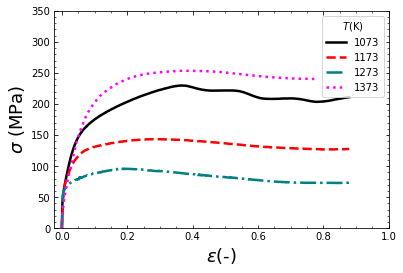

In [40]:
fig, ax = PyPlot.subplots()
ax.tick_params(which='both',direction="in",top=True,right=True)
ax.minorticks_on()

#for count,i in enumerate(data_dict.keys()):
for datas,line,colors,labels in zip(new_data_dict.values(),linestyle_list,set_colors,label_list):
    PyPlot.plot(datas['True Strain'],
                datas['True Stress'],
                color=colors,
                linewidth = 2.5,
                linestyle = line,
                label = labels
                )
    PyPlot.xlim(-0.025,max_strain_lim)
    PyPlot.ylim(0.0,max_stress_lim)
    PyPlot.xlabel(r'$\epsilon$(-)',fontsize=18)   # latex based symbols
    PyPlot.ylabel(r'$\sigma$ (MPa)',fontsize=18)
    PyPlot.legend(title=r'$ T (\mathrm{K})$')#,title_fontsize ='large')
        
fig.savefig('multi_stress_strain_cut_off.png',dpi=600)